In [15]:
## Import these libaries to start
import pandas as pd
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr

In [16]:
import os

notebook_path = r"C:\Users\nbwan\Downloads\PythontoSql.ipynb"

notebook_dir = os.path.dirname(notebook_path)
os.chdir(notebook_dir)

os.system(f"jupyter nbconvert --execute {notebook_path}")


1

## Connecting to Yahoo Finance through the yfinance python library to get data for selected 18 stocks

In [17]:
## Pick any dates, I chose 2000 for no reason in particular
start = dt.datetime(2000,1,1)
end = dt.datetime.now()

# Enhances Consistency and Compatibility from the yfinance library
yf.pdr_override()

# I chose these companies mostly because of their longetivity
company_symbols = ["MSFT", "AAPL", "JPM", "C", "WMT", "AMZN", "KO", "MCD", "XOM", "CVX", "GM", "F", "T", "JNJ", "DIS", "CMCSA", "GE", "BA"]

companies = pdr.get_data_yahoo(company_symbols, start, end)

## Not needed since Adjusted Close is a column, but feel free to keep it if needed
del companies['Close']


companies

[*********************100%***********************]  18 of 18 completed


Adj Close                                                 \
                  AAPL        AMZN          BA           C      CMCSA   
Date                                                                    
2000-01-03    0.849468    4.468750   25.940287  224.357864  11.511177   
2000-01-04    0.777850    4.096875   25.899939  210.599976  10.649373   
2000-01-05    0.789232    3.487500   27.513653  219.066406  10.372369   
2000-01-06    0.720933    3.278125   27.796036  229.649246  10.772488   
2000-01-07    0.755083    3.478125   28.602892  228.590912  10.433924   
...                ...         ...         ...         ...        ...   
2023-08-07  178.850006  142.220001  238.250000   45.830002  45.450001   
2023-08-08  179.800003  139.940002  238.039993   45.160000  45.400002   
2023-08-09  178.190002  137.850006  237.860001   44.439999  45.279999   
2023-08-10  177.970001  138.559998  238.259995   44.340000  45.930000   
2023-08-11  177.699997  138.589996  236.289993   44.474998  46.014999   

                                                                     ...  \
                   CVX        DIS          F          GE         GM  ...   
Date                                                                 ...   
2000-01-03   17.676733  23.115252  13.405160  164.646957        NaN  ...   
2000-01-04   17.676733  24.469286  12.957261  158.061020        NaN  ...   
2000-01-05   17.993797  25.484810  13.005247  157.786545        NaN  ...   
2000-01-06   18.760052  24.469286  13.021247  159.896179        NaN  ...   
2000-01-07   19.090342  24.082418  13.981042  166.087601        NaN  ...   
...                ...        ...        ...         ...        ...  ...   
2023-08-07  159.889999  86.830002  12.940000  114.730003  37.090000  ...   
2023-08-08  159.649994  88.129997  12.880000  113.550003  36.840000  ...   
2023-08-09  159.860001  87.489998  12.730000  112.169998  36.259998  ...   
2023-08-10  160.830002  91.760002  12.160000  113.570000  34.160000  ...   
2023-08-11  163.761093  89.824997  12.130000  115.089996  33.868801  ...   

             Volume                                                     \
                 GE          GM       JNJ       JPM        KO      MCD   
Date                                                                     
2000-01-03  3675284         NaN   4642400  12019200  10997000  4520600   
2000-01-04  3683877         NaN   7822200  11723400   7308000  4216500   
2000-01-05  4545070         NaN   8229600   8714550   9457400  5231600   
2000-01-06  3309484         NaN   5356400   8369250   7129200  4809400   
2000-01-07  3354147         NaN   9863800   6571950  11474000  5124700   
...             ...         ...       ...       ...       ...      ...   
2023-08-07  3304800   9910700.0  17736400   7251800   6982600  2176800   
2023-08-08  3779300  10281700.0  27378700   8623400   7956100  1948400   
2023-08-09  3112700   8254500.0  42974400   6277800   7904100  1895800   
2023-08-10  4671600  25570500.0  48211900   5993400   7868000  2436300   
2023-08-11  1834792  10670150.0  16447945   2165979   2589327   818563   

                                                   
                MSFT         T      WMT       XOM  
Date                                               
2000-01-03  53228400   7668476  8369900  13458200  
2000-01-04  54119000   9497846  6745100  14510800  
2000-01-05  64059600  12035160  7018700  17485000  
2000-01-06  54976600   9471366  6544500  19461600  
2000-01-07  62013600   7792534  7976900  16603800  
...              ...       ...      ...       ...  
2023-08-07  17741500  38109900  4756300  12410800  
2023-08-08  22327600  39075100  3672500  14065600  
2023-08-09  22373300  33951700  4403200  19919600  
2023-08-10  20093500  33543300  5056200  15834000  
2023-08-11  11641730  12663180  2079255   6344709  

[5940 rows x 90 columns]

## Creating individual dataframes to make individual tables within SQL and then exporting them to excel for easier upload to SQL database

In [18]:
## Create a copy of the dataframe so you don't get an error/warning  
StocksClose = companies['Adj Close'].copy()

## Create a SequenceNumber or some kind of identifier for SQL
StocksClose['SequenceNumber'] = range(1, len(StocksClose) + 1)

## Export a CSV or Excel file for easier loading into SQL
StocksClose.to_excel('StockClose.xlsx')
StocksClose

,AAPL,AMZN,BA,C,CMCSA,CVX,DIS,F,GE,GM,JNJ,JPM,KO,MCD,MSFT,T,WMT,XOM,SequenceNumber
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,0.849468,4.468750,25.940287,224.357864,11.511177,17.676733,23.115252,13.405160,164.646957,NaN,25.267576,24.239754,14.781786,22.305376,36.282253,7.150696,43.717712,18.821230,1
2000-01-04,0.777850,4.096875,25.899939,210.599976,10.649373,17.676733,24.469286,12.957261,158.061020,NaN,24.342524,23.707899,14.798182,21.848026,35.056641,6.732303,42.081879,18.460728,2
2000-01-05,0.789232,3.487500,27.513653,219.066406,10.372369,17.993797,25.484810,13.005247,157.786545,NaN,24.599485,23.561552,14.929285,22.199842,35.426281,6.836901,41.223076,19.467134,3
2000-01-06,0.720933,3.278125,27.796036,229.649246,10.772488,18.760052,24.469286,13.021247,159.896179,NaN,25.370354,23.896061,14.945670,21.883200,34.239552,6.704431,41.672901,20.473545,4
2000-01-07,0.755083,3.478125,28.602892,228.590912,10.433924,19.090342,24.082418,13.981042,166.087601,NaN,26.449583,24.335100,15.928941,22.446117,34.686996,6.761895,44.821888,20.413450,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-07,178.850006,142.220001,238.250000,45.830002,45.450001,159.889999,86.830002,12.940000,114.730003,37.090000,173.100006,156.759995,61.189999,291.399994,330.109985,14.010000,159.921494,107.199997,5936
2023-08-08,179.800003,139.940002,238.039993,45.160000,45.400002,159.649994,88.129997,12.880000,113.550003,36.840000,173.179993,155.880005,60.919998,289.579987,326.049988,14.180000,160.080917,107.730003,5937
2023-08-09,178.190002,137.850006,237.860001,44.439999,45.279999,159.860001,87.489998,12.730000,112.169998,36.259998,173.070007,153.789993,61.060001,288.230011,322.230011,14.270000,160.339996,109.559998,5938


In [19]:
## Create a copy of the dataframe so you don't get an error/warning
StocksOpen = companies['Open'].copy()

## Create a SequenceNumber or some kind of identifier for SQL
StocksOpen['SequenceNumber'] = range(1, len(StocksOpen) + 1)

## Export a CSV or Excel file for easier loading into SQL
StocksOpen.to_excel('StockOpen.xlsx')
StocksOpen

,AAPL,AMZN,BA,C,CMCSA,CVX,DIS,F,GE,GM,JNJ,JPM,KO,MCD,MSFT,T,WMT,XOM,SequenceNumber
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,0.936384,4.075000,41.437500,417.187500,16.145832,42.937500,28.855125,28.988474,306.251129,NaN,46.562500,49.833332,29.000000,39.937500,58.687500,36.678623,68.375000,39.750000,1
2000-01-04,0.966518,4.268750,40.187500,390.000000,15.208333,41.468750,29.594999,28.473276,294.741699,NaN,45.562500,47.083332,28.187500,39.312500,56.781250,35.545696,65.500000,38.687500,2
2000-01-05,0.926339,3.525000,41.375000,381.562500,14.250000,41.531250,31.198063,28.026772,287.735931,NaN,44.406250,46.833332,28.218750,38.812500,55.562500,33.987915,63.875000,39.000000,3
2000-01-06,0.947545,3.565625,42.625000,384.843750,13.916667,42.656250,32.492844,28.026772,286.484924,NaN,45.156250,46.750000,28.468750,39.125000,56.093750,33.657478,63.000000,40.312500,4
2000-01-07,0.861607,3.350000,43.687500,405.000000,14.625000,45.000000,31.198063,28.851088,296.242920,NaN,47.062500,48.416668,28.937500,39.000000,54.312500,33.657478,64.500000,42.968750,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-07,182.130005,140.990005,232.740005,45.950001,45.139999,161.009995,86.660004,12.930000,113.540001,36.830002,169.490005,156.600006,60.790001,287.880005,328.369995,14.010000,159.500000,107.900002,5936
2023-08-08,179.690002,140.619995,236.520004,45.020000,45.299999,157.940002,86.500000,12.770000,114.389999,36.279999,172.990005,154.320007,61.189999,291.049988,326.959991,13.940000,160.990005,106.040001,5937
2023-08-09,180.869995,139.970001,238.539993,45.020000,45.400002,160.860001,89.199997,12.770000,113.900002,36.500000,173.000000,155.320007,60.910000,289.000000,326.470001,14.170000,160.910004,108.709999,5938


In [20]:
StocksHigh = companies['High'].copy()
StocksHigh['SequenceNumber'] = range(1, len(StocksHigh) + 1)
StocksHigh.to_excel('StockHigh.xlsx')
StocksHigh

,AAPL,AMZN,BA,C,CMCSA,CVX,DIS,F,GE,GM,JNJ,JPM,KO,MCD,MSFT,T,WMT,XOM,SequenceNumber
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,1.004464,4.478125,41.687500,417.187500,16.333332,42.937500,29.533344,29.228899,307.627258,NaN,46.875000,50.250000,29.000000,40.062500,59.312500,37.009064,69.000000,40.375000,1
2000-01-04,0.987723,4.575000,41.125000,391.406250,15.708333,42.062500,31.444689,28.713701,296.242920,NaN,45.781250,47.458332,28.406250,39.562500,58.562500,36.064957,65.812500,39.093750,2
2000-01-05,0.987165,3.756250,43.312500,390.000000,14.333333,43.281250,32.677814,28.301542,294.241272,NaN,45.406250,48.375000,28.718750,40.375000,58.187500,34.176739,64.375000,40.875000,3
2000-01-06,0.955357,3.634375,43.437500,410.156250,15.041667,44.593750,32.677814,28.473276,294.116180,NaN,46.968750,48.625000,28.843750,39.375000,56.937500,33.987915,64.562500,42.906250,4
2000-01-07,0.901786,3.525000,44.875000,412.031250,14.625000,45.437500,31.691313,30.224949,303.999268,NaN,48.468750,49.000000,30.375000,40.000000,56.125000,33.799095,68.937500,43.125000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-07,183.130005,142.539993,238.979996,46.240002,45.599998,161.380005,87.230003,12.960000,114.980003,37.099998,173.339996,157.699997,61.330002,291.399994,331.109985,14.090000,161.210007,108.419998,5936
2023-08-08,180.270004,140.839996,240.729996,45.230000,45.610001,159.789993,88.330002,12.900000,114.830002,36.880001,173.550003,155.979996,61.349998,291.600006,328.750000,14.200000,161.619995,107.750000,5937
2023-08-09,180.929993,140.320007,241.240005,45.189999,45.639999,161.440002,89.559998,12.830000,113.930000,36.810001,174.250000,155.520004,61.630001,289.720001,327.109985,14.350000,162.100006,110.419998,5938


In [21]:
StocksLow = companies['Low'].copy()
StocksLow['SequenceNumber'] = range(1, len(StocksLow) + 1)
StocksLow.to_excel('StockLow.xlsx')
StocksLow

,AAPL,AMZN,BA,C,CMCSA,CVX,DIS,F,GE,GM,JNJ,JPM,KO,MCD,MSFT,T,WMT,XOM,SequenceNumber
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,0.907924,3.952344,39.812500,390.000000,15.062500,41.281250,28.361876,28.645008,298.619873,NaN,45.781250,48.083332,27.625000,38.937500,56.000000,35.215256,65.500000,38.937500,1
2000-01-04,0.903460,4.087500,39.750000,373.125000,14.000000,41.250000,29.594999,27.648958,288.236359,NaN,44.375000,46.125000,27.812500,38.375000,56.125000,32.854984,64.187500,38.250000,2
2000-01-05,0.919643,3.400000,41.375000,371.250000,13.625000,41.531250,31.198063,27.889385,285.359009,NaN,44.218750,46.000000,28.031250,38.812500,54.687500,33.563065,62.187500,38.906250,3
2000-01-06,0.848214,3.200000,41.125000,384.375000,13.791667,42.656250,31.198063,27.683306,285.484100,NaN,45.062500,46.500000,28.281250,38.687500,54.187500,32.571751,62.687500,40.093750,4
2000-01-07,0.852679,3.309375,43.687500,396.093750,13.875000,44.500000,30.396530,28.645008,294.241272,NaN,46.812500,47.333332,28.937500,38.875000,53.656250,32.760574,64.500000,42.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-07,177.350006,138.949997,232.740005,45.630001,45.090000,159.080002,85.989998,12.780000,113.540001,36.360001,169.360001,156.600006,60.740002,287.859985,327.519989,13.890000,159.110001,106.510002,5936
2023-08-08,177.580002,138.419998,236.000000,44.139999,45.150002,156.220001,86.099998,12.700000,113.120003,36.099998,171.389999,152.589996,60.619999,288.540009,323.000000,13.940000,159.509995,104.839996,5937
2023-08-09,177.009995,137.100006,236.410004,44.410000,45.169998,159.309998,87.040001,12.660000,111.980003,36.209999,172.050003,153.470001,60.750000,287.880005,321.049988,14.150000,160.710007,108.309998,5938


In [22]:
StocksVolume = companies['Volume'].copy()
StocksVolume['SequenceNumber'] = range(1, len(StocksVolume) + 1)
StocksVolume.to_excel('StockVolume.xlsx')
StocksVolume

,AAPL,AMZN,BA,C,CMCSA,CVX,DIS,F,GE,GM,JNJ,JPM,KO,MCD,MSFT,T,WMT,XOM,SequenceNumber
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,535796800,322352000,2638200,1681920,2333700,4387600,8402230,4056814,3675284,NaN,4642400,12019200,10997000,4520600,53228400,7668476,8369900,13458200,1
2000-01-04,512377600,349748000,3592100,2403280,1063500,3702400,16051191,7322428,3683877,NaN,7822200,11723400,7308000,4216500,54119000,9497846,6745100,14510800,2
2000-01-05,778321600,769148000,7631700,1742547,828900,5567600,19823822,5038354,4545070,NaN,8229600,8714550,9457400,5231600,64059600,12035160,7018700,17485000,3
2000-01-06,767972800,375040000,4922200,1863280,1103100,4353400,7903193,4545037,3309484,NaN,5356400,8369250,7129200,4809400,54976600,9471366,6544500,19461600,4
2000-01-07,460734400,210108000,6008300,1394587,738600,4487400,6773543,9266037,3354147,NaN,9863800,6571950,11474000,5124700,62013600,7792534,7976900,16603800,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-07,97576100,71213100,6068000,16972000,12529700,13927400,10818400,43929200,3304800,9910700.0,17736400,7251800,6982600,2176800,17741500,38109900,4756300,12410800,5936
2023-08-08,67823000,51710500,5149200,18524500,19889000,6451300,16767900,45103800,3779300,10281700.0,27378700,8623400,7956100,1948400,22327600,39075100,3672500,14065600,5937
2023-08-09,60378500,50017300,4044400,13957100,15184200,10531500,32517900,42932600,3112700,8254500.0,42974400,6277800,7904100,1895800,22373300,33951700,4403200,19919600,5938


## Uploading the data to SQL Server

In [23]:
## Download these libaries to start the process to connect to SQL Server
import pypyodbc
from sqlalchemy import create_engine
from sqlalchemy.engine import URL

SERVER_NAME = 'DESKTOP-K4HURDS\SQLEXPRESS01'
DATABASE_NAME = 'Projects'

## This method requires you to create the table in SQL Server before, if you want you can create the table inside of Python, but that is time consuming
Table_name = 'StocksClose'

connection_string = f"""
    DRIVER={{SQL Server}};
    SERVER={SERVER_NAME};
    DATABASE={DATABASE_NAME};
    Trusted_Connection=yes;
"""
## Try-Except statement in case there is an error connecting to the database
try:
    connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})
    engine = create_engine(connection_url, module=pypyodbc)

except pypyodbc.Error as db_error:
    print("Database connection error:", db_error)


## Try-Except statement in case there is an error with the file
try:
    StocksCloseCsv = pd.read_excel(r'C:\Users\nbwan\Python\StockClose.xlsx', sheet_name='Sheet1')
except FileNotFoundError:
    print("File not found:", r'C:\Users\nbwan\Python\StockClose.xlsx')
    
except PermissionError:
    print("Permission error for:", r'C:\Users\nbwan\Python\StockClose.xlsx')
  

## I pivoted the table using melt() for a better SQL Experince, below I will show what the Database query looks like (Markdown)
melted_data = StocksCloseCsv.melt(id_vars=['SequenceNumber', 'Date'], var_name='Company', value_name='StockClose')

pivot_table = melted_data[['SequenceNumber', 'Date', 'Company', 'StockClose']]

pivot_table.to_sql(Table_name, engine, if_exists='replace', index=False)


## Rinse and repeat for how many more tables you need, here i did four more which you can see below

24

## Example of the SQL Query after the pivot and upload

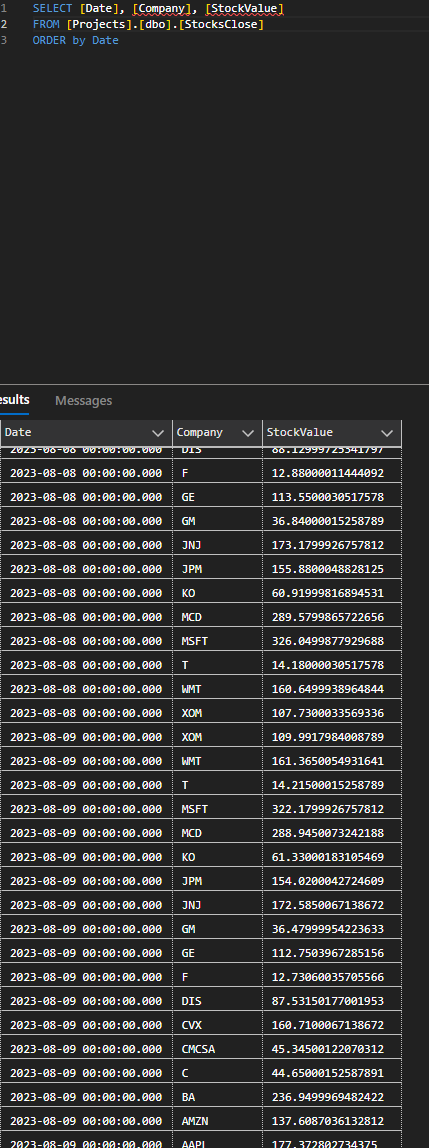

In [24]:
SERVER_NAME = 'DESKTOP-K4HURDS\SQLEXPRESS01'
DATABASE_NAME = 'Projects'
Table_name = 'StocksOpen'

connection_string = f"""
    DRIVER={{SQL Server}};
    SERVER={SERVER_NAME};
    DATABASE={DATABASE_NAME};
    Trusted_Connection=yes;
"""
## Try-Except statement in case there is an error connecting to the database
try:
    connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})
    engine = create_engine(connection_url, module=pypyodbc)

except pypyodbc.Error as db_error:
    print("Database connection error:", db_error)


## Try-Except statement in case there is an error with the file
try:
    StocksOpenCsv = pd.read_excel(r'C:\Users\nbwan\Python\StockOpen.xlsx', sheet_name='Sheet1')
except FileNotFoundError:
    print("File not found:", r'C:\Users\nbwan\Python\StockOpen.xlsx')
    
except PermissionError:
    print("Permission error for:", r'C:\Users\nbwan\Python\StockOpen.xlsx')
  

melted_data = StocksCloseCsv.melt(id_vars=['SequenceNumber', 'Date'], var_name='Company', value_name='StockOpen')

pivot_table = melted_data[['SequenceNumber', 'Date', 'Company', 'StockOpen']]

pivot_table.to_sql(Table_name, engine, if_exists='replace', index=False)


## Rinse and repeat for how many more tables you need, here i did four more which you can see below


24

In [25]:
SERVER_NAME = 'DESKTOP-K4HURDS\SQLEXPRESS01'
DATABASE_NAME = 'Projects'
Table_name = 'StocksHigh'

connection_string = f"""
    DRIVER={{SQL Server}};
    SERVER={SERVER_NAME};
    DATABASE={DATABASE_NAME};
    Trusted_Connection=yes;
"""

try:
    connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})
    engine = create_engine(connection_url, module=pypyodbc)

except pypyodbc.Error as db_error:
    print("Database connection error:", db_error)

try:
    StocksHighCsv = pd.read_excel(r'C:\Users\nbwan\Python\StockHigh.xlsx', sheet_name='Sheet1')
    
except FileNotFoundError:
    print("File not found:", r'C:\Users\nbwan\Python\StockHigh.xlsx')
    
except PermissionError:
    print("Permission error for:", r'C:\Users\nbwan\Python\StockHigh.xlsx')

melted_data = StocksHighCsv.melt(id_vars=['SequenceNumber', 'Date'], var_name='Company', value_name='StockClose')

pivot_table = melted_data[['SequenceNumber', 'Date', 'Company', 'StockClose']]

pivot_table.to_sql(Table_name, engine, if_exists='replace', index=False)

24

In [26]:
SERVER_NAME = 'DESKTOP-K4HURDS\SQLEXPRESS01'
DATABASE_NAME = 'Projects'
Table_name = 'StocksLow'

connection_string = f"""
    DRIVER={{SQL Server}};
    SERVER={SERVER_NAME};
    DATABASE={DATABASE_NAME};
    Trusted_Connection=yes;
"""

try:
    connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})
    engine = create_engine(connection_url, module=pypyodbc)

except pypyodbc.Error as db_error:
    print("Database connection error:", db_error)

try:
    StocksLowCsv = pd.read_excel(r'C:\Users\nbwan\Python\StockLow.xlsx', sheet_name='Sheet1')

except FileNotFoundError:
    print("File not found:", r'C:\Users\nbwan\Python\StockLow.xlsx')
    
except PermissionError:
    print("Permission error for:", r'C:\Users\nbwan\Python\StockLow.xlsx')

melted_data = StocksLowCsv.melt(id_vars=['SequenceNumber', 'Date'], var_name='Company', value_name='StockClose')

pivot_table = melted_data[['SequenceNumber', 'Date', 'Company', 'StockClose']]

pivot_table.to_sql(Table_name, engine, if_exists='replace', index=False)

24

In [27]:
SERVER_NAME = 'DESKTOP-K4HURDS\SQLEXPRESS01'
DATABASE_NAME = 'Projects'
Table_name = 'StocksVolume'

connection_string = f"""
    DRIVER={{SQL Server}};
    SERVER={SERVER_NAME};
    DATABASE={DATABASE_NAME};
    Trusted_Connection=yes;
"""

try:
    connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})
    engine = create_engine(connection_url, module=pypyodbc)

except pypyodbc.Error as db_error:
    print("Database connection error:", db_error)

try:
    StocksVolumeCsv = pd.read_excel(r'C:\Users\nbwan\Python\StockVolume.xlsx', sheet_name='Sheet1')

except FileNotFoundError:
    print("File not found:", r'C:\Users\nbwan\Python\StockVolume.xlsx')
    
except PermissionError:
    print("Permission error for:", r'C:\Users\nbwan\Python\StockVolume.xlsx')

melted_data = StocksVolumeCsv.melt(id_vars=['SequenceNumber', 'Date'], var_name='Company', value_name='StockClose')

pivot_table = melted_data[['SequenceNumber', 'Date', 'Company', 'StockClose']]

pivot_table.to_sql(Table_name, engine, if_exists='replace', index=False)

24

In [28]:
import pytz
from datetime import datetime, timedelta

eastern_tz = pytz.timezone('US/Eastern')

now = datetime.now(eastern_tz)


print(now)


2023-08-11 12:34:47.724507-04:00
